<a href="https://colab.research.google.com/github/choiminji-020102/Image-processing_Deep-learning/blob/main/10_custom_dataset_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
딥러닝은 크게 데이터 준비, 모델 구축, 모델 학습, 모델 평가로 구성됩니다.<br>
이번시간에는 첫 번째 단계인 <U>**`데이터셋` 을 구성하고 학습을 위해 가공하는 과정**</U>에 대해 공부해보도록 하겠습니다.<br>

## 0. 데이터셋 다운받기

**<span style="color:red">※ 이번실습에서는 1번~4번까지의 과정을 수행하지 않으셔도 됩니다. (스마트리드 첨부자료 사용)<br> 향후 과제를 진행하실 때 참고하시기 바랍니다.</span>**

### [데이터셋 다운]
1. https://www.kaggle.com/jessicali9530/caltech256/version/2 <br>
페이지 상단에 있는 `Download(1 GB)`버튼 누르기
<img src='https://user-images.githubusercontent.com/46768752/138972510-22507274-7013-49b1-9c3c-0557abce64ee.png' alt='다운로드 버튼' width='500'>

2. 로그인 후, 다시 버튼눌러서 데이터셋 다운받기
3. 다운받아진 `archive.zip` 파일 압축 풀기
4. `256_ObjectCategories` 폴더에 들어가서 200여개의 카테고리와 해당 이미지가 들어있는 것 확인해보기

### [colab 사용]
5. colab 런타임 유형 변경하기
    - 왼쪽 상단에 `런타임` 버튼 누르기 -> `런타임 유형 변경` 버튼 누르기 -> None을 GPU로 바꾸기<br>

6. bathtub, bear, beer-mug 카테고리의 이미지 사용하여 진행 <br>
   세 폴더에서 마음에 드는 사진 10장씩 골라 colab에 이미지 업로드하기
    - 1) colab 왼쪽 bar에서 폴더아이콘 누르기 <br>
    - 2) 마우스 우클릭 --> 새 폴더 --> 'data' 라는 폴더 만들기 <br>
    - 3) 만들어진 data 폴더에 마우스 갖다놓고 2번과 동일한 방법으로 train 폴더 만들기
    - 4) 동일한 방법으로 train 폴더 안에 bathtub, bear, beer-mug 폴더 만들기
    - 5) 마음에 드는 사진 10장 골라서 각 클래스 폴더 안에 넣기 <br>
    (사진 선택해서 해당 폴더에 드래그 하면 업로드 할 수 있습니다.)
    
위 과정을 모두 완료 한다면 데이터셋은 다음과 같은 형태로 구성됩니다.

<p align="center"><img src='https://user-images.githubusercontent.com/46768752/138975455-2fee8a3a-8a60-4e42-81e0-002911ebf621.png' alt='데이터셋 구성' /></p>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 데이터셋 구성하기

**데이터셋 구성 과정**은 다음과 같습니다. <br>
> 1) 데이터셋이 저장되어 있는 경로를 파악합니다. <br>
> 2) 데이터 이름(name)과 클래스(class), 그리고 학습을 위해 클래스(class)를 숫자로 나타낸 타겟(target)을 csv 파일에 저장합니다.


- 우선, 필요한 module을 import 해줍니다.

In [ ]:
# 사용할 데이터 준비하기
# https://www.kaggle.com/jessicali9530/caltech256/version/2
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

현재 데이터는 다음과 같은 형태로 file과 directory가 구성되어 있습니다.

```
./data/train/bathtub/xxx.jpg
./data/train/bathtub/xxx.jpg

./data/train/bear/xxx.jpg
./data/train/bear/xxx.jpg

./data/train/beer-mug/xxx.jpg
./data/train/beer-mug/xxx.jpg
```

- 각 클래스(backpack, butterfly, coin)별로 디렉토리가 따로 구성되어 있음을 알 수 있습니다.
- `glob`를 통해 파일경로를 리스트로 받아옵니다.

In [ ]:
# file_path = '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data/train/*/*.jpg'

# file_list = glob(file_path)
# file_list

- 해당 클래스를 학습에서 사용하기 위해 bathtub는 0으로, bear는 1로, 마지막으로 beer-mug는 3으로 설정하여 `target`이라는 항목에 저장합니다.
- 데이터 이름과 클래스, 타겟을 `pd.DataFrame`을 통해 dataframe으로 구성한 후 `csv`파일로 만들어줍니다.

In [ ]:
# data_dict = {'image_name':[], 'class':[], 'target':[], 'file_path':[]}
# target_dict = {'bathtub':0, 'bear':1, 'beer-mug':2}

# for path in file_list:

#     data_dict['file_path'].append(path) # file_path 항목에 파일 경로 저장

#     path_list = path.split(os.path.sep) # os별 파일 경로 구분 문자로 split
#     print(path_list)

#     data_dict['image_name'].append(path_list[-1])
#     data_dict['class'].append(path_list[-2])
#     data_dict['target'].append(target_dict[path_list[-2]])

# train_df = pd.DataFrame(data_dict)
# print('\n<data frame>\n', train_df)

# train_df.to_csv("/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data/train.csv", mode='w')

## 2. 데이터셋 불러오기

- `1.데이터셋 구성하기` 에서 저장했던 `train.csv` 파일을 통해 데이터셋을 불러옵니다.
- `scikit learn의 train_test_split`를 사용하여 데이터셋을 train, validation, test로 나눠줍니다.


In [ ]:
# from sklearn.model_selection import train_test_split

# def get_df():

#     # cvs 파일 읽어서 DataFrame으로 저장
#     df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data/train.csv')

#     # 데이터셋을 train, val, test로 나누기
#     df_train, df_test = train_test_split(df, test_size=0.2, random_state=2359)
#     df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=2359)

#     return df_train, df_val, df_test

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/*/*.jpeg'

file_list = glob(file_path)
file_list

- 해당 클래스를 학습에서 사용하기 위해 karina는 0으로, winter는 1로, ningning은 2으로, giselle은 3로 설정하여 `target`이라는 항목에 저장합니다.


In [ ]:
data_dict = {'image_name':[], 'class':[], 'target':[], 'file_path':[]}
target_dict = {'karina':0, 'winter':1, 'ningning':2, 'giselle':3}

for path in file_list:

    data_dict['file_path'].append(path) # file_path 항목에 파일 경로 저장

    path_list = path.split(os.path.sep) # os별 파일 경로 구분 문자로 split
    print(path_list)

    data_dict['image_name'].append(path_list[-1])
    data_dict['class'].append(path_list[-2])
    data_dict['target'].append(target_dict[path_list[-2]])

train_df = pd.DataFrame(data_dict)
print('\n<data frame>\n', train_df)

train_df.to_csv("/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/train.csv", mode='w')

## 2. 데이터셋 불러오기

In [ ]:
from sklearn.model_selection import train_test_split

def get_df():

    # cvs 파일 읽어서 DataFrame으로 저장
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/train.csv')

    # 데이터셋을 train, val, test로 나누기
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=2359)
    df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=2359)

    return df_train, df_val, df_test

In [ ]:
# 데이터셋 읽어오기
df_train, df_val, df_test = get_df()
print(len(df_train), len(df_val), len(df_test))

25 7 8


## 3. 학습시, 데이터셋을 사용할 수 있도록 만들기

### 3-1. Dataset Class
- pytorch가 dataset을 어떻게 읽을지 알려주는 class입니다.
- `__len__`과 `__getitem__` 부분은 필수적으로 필요한 method입니다.


```python
class 내가만든_데이터셋(Dataset):
    def __init__(self, csv, mode, meta_features, transform=None):
        # 데이터셋 초기화
    def __len__(self):
        # 데이터셋 크기 리턴
        return self.csv.shape[0]
    def __getitem__(self, index):
        # 인덱스에 해당하는 이미지 리턴
    return data, torch.tensor(self.csv.iloc[index].target).long()

```

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class Classification_Dataset(Dataset):
    def __init__(self, csv, mode, transform=None):
        self.csv = csv.reset_index(drop=True)  # random으로 섞인 데이터의 인덱스를 reset 시켜서 다시 부여한다.
        self.transform = transform

    def __len__(self):
        return self.csv.shape[0]  # csv 파일의 행 개수 == 데이터 개수

    def __getitem__(self, index):
        row = self.csv.iloc[index]                       # 주어진 index에 대한 데이터 뽑아오기
        image = Image.open(row.file_path).convert('RGB') # 파일경로로 부터 이미지를 읽고 rgb로 변환하기
        target = torch.tensor(self.csv.iloc[index].target).long()

        if self.transform:
            image = self.transform(image) # 이미지에 transform 적용하기

        return image, target  # 이미지와 target return하기

- `csv.reset_index(drop=True)` 는 아래 결과를 통해 역할을 알 수 있습니다.

In [ ]:
df_train

In [ ]:
df_train.reset_index(drop=True)

- `Classification_Dataset`에서 `__len__`과 `__getitem__`의 결과를 확인해보겠습니다.

In [ ]:
from torchvision import transforms
dataset_train = Classification_Dataset(df_train, 'train', transform=transforms.ToTensor())

print(f'>> 데이터 셋 전체 크기, 개수, sample개수 : {dataset_train.__len__()}')
print(f'>> i번째 데이터 불러오기 : dataset_train.__getitem__(i)')
print(f'>> 0번째 데이터 불러와지는 형태 : tuple (이미지 픽셀값, target)\n : {dataset_train.__getitem__(0)}')

>> 데이터 셋 전체 크기, 개수, sample개수 : 25
>> i번째 데이터 불러오기 : dataset_train.__getitem__(i)
>> 0번째 데이터 불러와지는 형태 : tuple (이미지 픽셀값, target)
 : (tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0000],
         ...,
         [0.0157, 0.0157, 0.0118,  ..., 0.0431, 0.0588, 0.0667],
         [0.0235, 0.0196, 0.0118,  ..., 0.0196, 0.0392, 0.0471],
         [0.0275, 0.0196, 0.0118,  ..., 0.0157, 0.0314, 0.0353]],

        [[0.2824, 0.2824, 0.2863,  ..., 0.2510, 0.2510, 0.2510],
         [0.2863, 0.2863, 0.2863,  ..., 0.2549, 0.2510, 0.2510],
         [0.2863, 0.2863, 0.2863,  ..., 0.2549, 0.2549, 0.2510],
         ...,
         [0.3490, 0.3490, 0.3412,  ..., 0.3569, 0.3725, 0.3804],
         [0.3529, 0.3490, 0.3412,  ..., 0.3490, 0.3569, 0.3647],
         [0.3569, 0.3490, 0.3412,  ..., 0.3529, 0.3490, 0.3529]],

        [[0.3176, 0.3176, 0.3216,  ..., 0.2902, 0.2902, 0

### 3-2. Transforms & Augmentation
#### [Transforms]
- 구축한 데이터셋에서 이미지 파일은 서로 크기가 다를 수 있기 때문에, <U>같은 크기</U>로 맞춰주어야 합니다.
    - `transforms.Normalize([r채널의 mean, g채널의 mean, b채널의 mean], [r채널의 std, g채널의 std, b채널의 std])` : normalize
    - `transforms.Resize()` : 크기 변경
    - `transforms.CenterCrop()`, `transforms.RandomResizedCrop()` : 잘라내기

- 예시
```python
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
                               ])
```
- `transforms.Normalize()`는 이미지의 픽셀값을 정규화하는 과정입니다. <br>
본 과정을 수행해야 원활하게 학습이 이루어지게 됩니다.
3개의 채널로 구성되어 있는 이미지의 경우 아래와 같이 normalize 됩니다.

    - `input[channel] = (input[channel] - mean[channel]) / std[channel]`
    - 입력 픽셀값에 mean을 빼주게 되면 픽셀값이 0을 중심으로 두게 변형되고, std를 나누면 픽셀값이 -1과 1 사이로 분포를 이루게 됩니다.
    - 채널별 mean, std를 구하는 방법은 아래에 나와있습니다.




#### [Augmentation]
- 일반적으로 데이터의 양이 많을수록 좋은 성능을 갖기 때문에, 데이터를 random하게 변경하여 새로운 데이터로 사용하여 학습 시 사용하는 <U>데이터의 양을 늘릴</U> 수 있습니다.
- 입력 이미지를 랜덤하게 변경함으로써 모델이 풀어야 할 문제(예:이미지 클래스 맞추기)를 더 어렵게 만들어 <U>overfitting을 방지</U>하는 데에도 도움이 됩니다.
- https://pytorch.org/vision/stable/transforms.html 에서 더 많은 예시를 보실 수 있습니다.
- 예시
    - `transforms.RandomRotation` : 랜덤하게 회전하기
    - `transforms.RandomHorizontalFlip()` : 랜덤하게 수평으로 뒤집기

In [ ]:
# normalize를 위해 rgb 채널의 mean, std 값 구하기

import numpy as np

dataset_train = Classification_Dataset(df_train, 'train', transform=transforms.ToTensor())

# 데이터(shape:torch.Size([3, 381, 343])) rgb에 대한 mean, std 구하기
rgb_mean = [np.mean(x.numpy(), axis=(1,2)) for x,_ in dataset_train]
rgb_std = [np.std(x.numpy(), axis=(1,2)) for x,_ in dataset_train]


# 각 데이터 채널별로 mean, std 나타내기
c_mean = []
c_std = []
for i in range(3):
    c_mean.append(np.mean([m[i] for m in rgb_mean]))
    c_std.append(np.std([s[i] for s in rgb_std]))

print(f'rgb mean: {c_mean}\nrgb std: {c_std}')

rgb mean: [0.53354925, 0.49781215, 0.49590632]
rgb std: [0.06730388, 0.051390026, 0.053963047]


In [ ]:
from torchvision import transforms

def get_transforms(image_size):

    transforms_train = transforms.Compose([
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(image_size),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5438486, 0.51331395, 0.4501529],
                                                            [0.07585379, 0.07164218, 0.08385534])])

    transforms_val = transforms.Compose([transforms.Resize(image_size+30),
                                      transforms.CenterCrop(image_size),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5438486, 0.51331395, 0.4501529],
                                                            [0.07585379, 0.07164218, 0.08385534])])

    return transforms_train, transforms_val

In [ ]:
# 모델 트랜스폼 가져오기
transforms_train, transforms_val = get_transforms(224)

In [ ]:
# dataset class 객체 만들기
dataset_train = Classification_Dataset(df_train, 'train', transform=transforms_train)
dataset_val = Classification_Dataset(df_val, 'valid', transform=transforms_val)

### 3-3. Data Loaders
- `DataLoader`는 `Classification_Dataset`으로 받아온 데이터(이미지, target)를 **batch**로 묶어 return합니다.

In [ ]:
from torch.utils.data.sampler import RandomSampler
from torch.utils.data import DataLoader

train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=5, sampler=RandomSampler(dataset_train), num_workers=0)
valid_loader = torch.utils.data.DataLoader(dataset_val, batch_size=5, num_workers=0)

- 해당 DataLoader는 generator로, 다음과 같이 데이터를 불러올 수 있습니다.

In [ ]:
for images, targets in train_loader:
    print(f'[batch, channel, ...] : {images.shape}')
    print(targets.shape)

[batch, channel, ...] : torch.Size([5, 3, 224, 224])
torch.Size([5])
[batch, channel, ...] : torch.Size([5, 3, 224, 224])
torch.Size([5])
[batch, channel, ...] : torch.Size([5, 3, 224, 224])
torch.Size([5])
[batch, channel, ...] : torch.Size([5, 3, 224, 224])
torch.Size([5])
[batch, channel, ...] : torch.Size([5, 3, 224, 224])
torch.Size([5])


#### 데이터 준비 파트는 마무리가 되었습니다. 큰 틀을 살펴보면서 정리해보도록 하겠습니다.

- `0. 데이터셋 다운받기`: 여러분이 수집한 데이터의 클래스별로 폴더를 구성하여 데이터셋을 준비합니다.
- `1. 데이터셋 구성하기`: 저장한 데이터의 정보를 csv 파일로 만듭니다.
- `2. 데이터셋 불러오기`: csv 파일을 통해 데이터를 불러와서 train, validation, test로 나눠줍니다.
- `3. 학습 시, 데이터셋을 사용할 수 있도록 만들기`
    - `3-1. Dataset Class`: pytorch가 dataset을 어떻게 읽을지 알려주는 클래스를 만듭니다. (데이터셋 크기와 지정한 인덱스별로 데이터를 리턴해주는 len, getitem 함수가 포함되어 있습니다.)
    - `3-2. Transforms & Augmentation`: 학습을 위해 데이터를 가공합니다.
    - `3-3. Data Loaders`: 배치별로 데이터를 묶어줍니다. Training시, 배치단위별로 데이터가 호출됩니다.

___

# 4. Model

`VGG16` 모델을 transfer learning하는 방식으로 진행합니다. <br>
자세한 예는 https://pytorch.org/vision/stable/models.html 에 나와있습니다.

<img src='https://user-images.githubusercontent.com/46768752/138986562-1cbfcd9a-da6b-45e8-b4ae-3b2af0d2ae16.png'>

In [ ]:
from torchvision import models
from collections import OrderedDict
import torch.nn as nn

model = models.vgg16(pretrained=True)
# model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 132MB/s]


In [ ]:
# Backprop을 수행하지 않도록 parameter들을 동결시키기
# 재학습을 위해, 모든 parameters의 gradient를 꺼놓기
for param in model.parameters():
    param.requires_grad = False

# 마지막 layer를 과제에 맞게 수정하기
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 4))
                          ]))

model.classifier = classifier

# 5. Training

In [ ]:
import numpy as np
import cv2
import random
import time
import torch.optim as optim

from tqdm import tqdm

## 3-1. Train

In [ ]:
def train_epoch(model, loader, device, criterion, optimizer):

    model.train()   # 모델 train 모드로 바꾸기
    train_loss = []
    bar = tqdm(loader)
    for i, (data, target) in enumerate(bar):

        optimizer.zero_grad()  # 최적화된 모든 변수 초기화

        data, target = data.to(device), target.to(device)  # 지정한 device로 데이터 옮기기
        logits = model(data)              # 1. forward pass

        loss = criterion(logits, target)  # 2. loss 계산
        loss.backward()                   # 3. backward pass

        optimizer.step()                  # 4. gradient descent(파라미터 업데이트)

        loss_np = loss.detach().cpu().numpy() # loss값 가져오기 위해 gpu에 있던 데이터 모두 cpu로 옮기기
        train_loss.append(loss_np)
        bar.set_description('loss: %.5f' % (loss_np))

    train_loss = np.mean(train_loss)  # 한 epoch당 train loss의 평균 구하기
    return train_loss

## 3-2. Validation

In [ ]:
def val_epoch(model, loader, device, criterion):  # loader: Classification_Dataset으로 받아온 데이터(이미지, target)를 batch로 묶어 return

    model.eval()  # 모델 evaluate 모드로 바꾸기
    val_loss = []
    LOGITS = []
    PROBS = []
    TARGETS = []
    with torch.no_grad():
        for (data, target) in tqdm(loader):

            data, target = data.to(device), target.to(device) # 지정한 device로 데이터 옮기기
            logits = model(data) # 1. forward pass
            probs = logits.softmax(1)  # 다중분류 -> 각 클래스일 확률을 전체 1로 두고 계산하기

            LOGITS.append(logits.detach().cpu())
            PROBS.append(probs.detach().cpu())
            TARGETS.append(target.detach().cpu())

            loss = criterion(logits, target) # 2. loss 계산
            val_loss.append(loss.detach().cpu().numpy())

    val_loss = np.mean(val_loss)
    LOGITS = torch.cat(LOGITS).numpy()
    PROBS = torch.cat(PROBS).numpy()
    TARGETS = torch.cat(TARGETS).numpy()

    # accuracy : 정확도
    acc = (PROBS.argmax(1) == TARGETS).mean() * 100.

    return val_loss, acc

## 3-3. 학습시키기

In [ ]:
train_loss_list = []
val_loss_list = []
def run(model, init_lr, n_epochs):

    # gpu 사용
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # model을 지정한 장치로 옮기기
    model = model.to(device)

    # loss function 지정
    criterion= nn.CrossEntropyLoss()

    # optimizer로 adam 사용
    optimizer = optim.Adam(model.parameters(), lr=init_lr)

    for epoch in range(1, n_epochs + 1):
        print(time.ctime(), f'Epoch {epoch}')

        train_loss = train_epoch(model, train_loader, device, criterion, optimizer) # train
        val_loss, acc = val_epoch(model, valid_loader, device, criterion) # validation

        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        content = time.ctime() + ' ' + f'Epoch {epoch}, lr: {optimizer.param_groups[0]["lr"]:.7f}, train loss: {train_loss:.5f}, valid loss: {(val_loss):.5f}, Acc: {(acc):.4f}.'
        print(content)

    torch.save(model.state_dict(), 'best_model.pth')


In [ ]:
run(model, init_lr=4e-6, n_epochs=100)

Tue Nov  7 08:02:24 2023 Epoch 1


100%|██████████| 2/2 [00:00<00:00,  8.51it/s]


Tue Nov  7 08:02:25 2023 Epoch 1, lr: 0.0000040, train loss: 0.25332, valid loss: 2.26704, Acc: 0.0000.
Tue Nov  7 08:02:25 2023 Epoch 2


100%|██████████| 2/2 [00:00<00:00, 14.11it/s]


Tue Nov  7 08:02:26 2023 Epoch 2, lr: 0.0000040, train loss: 0.28459, valid loss: 2.20761, Acc: 0.0000.
Tue Nov  7 08:02:26 2023 Epoch 3


100%|██████████| 2/2 [00:00<00:00,  6.98it/s]


Tue Nov  7 08:02:28 2023 Epoch 3, lr: 0.0000040, train loss: 0.23152, valid loss: 2.30108, Acc: 0.0000.
Tue Nov  7 08:02:28 2023 Epoch 4


100%|██████████| 2/2 [00:00<00:00,  6.47it/s]


Tue Nov  7 08:02:29 2023 Epoch 4, lr: 0.0000040, train loss: 0.29779, valid loss: 2.37414, Acc: 0.0000.
Tue Nov  7 08:02:29 2023 Epoch 5


100%|██████████| 2/2 [00:00<00:00,  5.70it/s]


Tue Nov  7 08:02:31 2023 Epoch 5, lr: 0.0000040, train loss: 0.24375, valid loss: 2.47770, Acc: 0.0000.
Tue Nov  7 08:02:31 2023 Epoch 6


100%|██████████| 2/2 [00:00<00:00,  7.90it/s]


Tue Nov  7 08:02:32 2023 Epoch 6, lr: 0.0000040, train loss: 0.25139, valid loss: 2.51861, Acc: 0.0000.
Tue Nov  7 08:02:32 2023 Epoch 7


100%|██████████| 2/2 [00:00<00:00, 10.35it/s]


Tue Nov  7 08:02:33 2023 Epoch 7, lr: 0.0000040, train loss: 0.28497, valid loss: 2.49146, Acc: 0.0000.
Tue Nov  7 08:02:33 2023 Epoch 8


100%|██████████| 2/2 [00:00<00:00, 15.62it/s]


Tue Nov  7 08:02:34 2023 Epoch 8, lr: 0.0000040, train loss: 0.34648, valid loss: 2.45682, Acc: 0.0000.
Tue Nov  7 08:02:34 2023 Epoch 9


100%|██████████| 2/2 [00:00<00:00, 13.41it/s]


Tue Nov  7 08:02:35 2023 Epoch 9, lr: 0.0000040, train loss: 0.21778, valid loss: 2.39212, Acc: 0.0000.
Tue Nov  7 08:02:35 2023 Epoch 10


100%|██████████| 2/2 [00:00<00:00, 10.24it/s]


Tue Nov  7 08:02:36 2023 Epoch 10, lr: 0.0000040, train loss: 0.26963, valid loss: 2.37927, Acc: 0.0000.
Tue Nov  7 08:02:36 2023 Epoch 11


100%|██████████| 2/2 [00:00<00:00, 12.82it/s]


Tue Nov  7 08:02:37 2023 Epoch 11, lr: 0.0000040, train loss: 0.28705, valid loss: 2.41174, Acc: 0.0000.
Tue Nov  7 08:02:37 2023 Epoch 12


100%|██████████| 2/2 [00:00<00:00, 10.37it/s]


Tue Nov  7 08:02:38 2023 Epoch 12, lr: 0.0000040, train loss: 0.36130, valid loss: 2.43668, Acc: 0.0000.
Tue Nov  7 08:02:38 2023 Epoch 13


100%|██████████| 2/2 [00:00<00:00,  9.35it/s]


Tue Nov  7 08:02:39 2023 Epoch 13, lr: 0.0000040, train loss: 0.16396, valid loss: 2.45514, Acc: 0.0000.
Tue Nov  7 08:02:39 2023 Epoch 14


100%|██████████| 2/2 [00:00<00:00, 18.94it/s]


Tue Nov  7 08:02:40 2023 Epoch 14, lr: 0.0000040, train loss: 0.22836, valid loss: 2.39488, Acc: 14.2857.
Tue Nov  7 08:02:40 2023 Epoch 15


100%|██████████| 2/2 [00:00<00:00, 21.22it/s]


Tue Nov  7 08:02:40 2023 Epoch 15, lr: 0.0000040, train loss: 0.29233, valid loss: 2.36482, Acc: 14.2857.
Tue Nov  7 08:02:40 2023 Epoch 16


100%|██████████| 2/2 [00:00<00:00, 21.57it/s]


Tue Nov  7 08:02:41 2023 Epoch 16, lr: 0.0000040, train loss: 0.20342, valid loss: 2.39124, Acc: 14.2857.
Tue Nov  7 08:02:41 2023 Epoch 17


100%|██████████| 2/2 [00:00<00:00, 22.13it/s]


Tue Nov  7 08:02:42 2023 Epoch 17, lr: 0.0000040, train loss: 0.27329, valid loss: 2.44878, Acc: 0.0000.
Tue Nov  7 08:02:42 2023 Epoch 18


100%|██████████| 2/2 [00:00<00:00, 22.05it/s]


Tue Nov  7 08:02:42 2023 Epoch 18, lr: 0.0000040, train loss: 0.12999, valid loss: 2.46913, Acc: 0.0000.
Tue Nov  7 08:02:42 2023 Epoch 19


100%|██████████| 2/2 [00:00<00:00, 18.80it/s]


Tue Nov  7 08:02:43 2023 Epoch 19, lr: 0.0000040, train loss: 0.35006, valid loss: 2.47408, Acc: 0.0000.
Tue Nov  7 08:02:43 2023 Epoch 20


100%|██████████| 2/2 [00:00<00:00, 19.16it/s]


Tue Nov  7 08:02:43 2023 Epoch 20, lr: 0.0000040, train loss: 0.23480, valid loss: 2.46149, Acc: 14.2857.
Tue Nov  7 08:02:43 2023 Epoch 21


100%|██████████| 2/2 [00:00<00:00, 17.89it/s]


Tue Nov  7 08:02:44 2023 Epoch 21, lr: 0.0000040, train loss: 0.40042, valid loss: 2.46730, Acc: 14.2857.
Tue Nov  7 08:02:44 2023 Epoch 22


100%|██████████| 2/2 [00:00<00:00, 18.59it/s]


Tue Nov  7 08:02:44 2023 Epoch 22, lr: 0.0000040, train loss: 0.16887, valid loss: 2.45124, Acc: 14.2857.
Tue Nov  7 08:02:44 2023 Epoch 23


100%|██████████| 2/2 [00:00<00:00, 18.47it/s]


Tue Nov  7 08:02:45 2023 Epoch 23, lr: 0.0000040, train loss: 0.14080, valid loss: 2.44119, Acc: 14.2857.
Tue Nov  7 08:02:45 2023 Epoch 24


100%|██████████| 2/2 [00:00<00:00, 18.89it/s]


Tue Nov  7 08:02:46 2023 Epoch 24, lr: 0.0000040, train loss: 0.41746, valid loss: 2.45671, Acc: 14.2857.
Tue Nov  7 08:02:46 2023 Epoch 25


100%|██████████| 2/2 [00:00<00:00, 17.14it/s]


Tue Nov  7 08:02:46 2023 Epoch 25, lr: 0.0000040, train loss: 0.19464, valid loss: 2.41030, Acc: 14.2857.
Tue Nov  7 08:02:46 2023 Epoch 26


100%|██████████| 2/2 [00:00<00:00, 17.94it/s]


Tue Nov  7 08:02:47 2023 Epoch 26, lr: 0.0000040, train loss: 0.28890, valid loss: 2.40545, Acc: 14.2857.
Tue Nov  7 08:02:47 2023 Epoch 27


100%|██████████| 2/2 [00:00<00:00, 16.74it/s]


Tue Nov  7 08:02:48 2023 Epoch 27, lr: 0.0000040, train loss: 0.22491, valid loss: 2.45516, Acc: 14.2857.
Tue Nov  7 08:02:48 2023 Epoch 28


100%|██████████| 2/2 [00:00<00:00, 21.10it/s]


Tue Nov  7 08:02:48 2023 Epoch 28, lr: 0.0000040, train loss: 0.21026, valid loss: 2.52755, Acc: 14.2857.
Tue Nov  7 08:02:48 2023 Epoch 29


100%|██████████| 2/2 [00:00<00:00, 20.73it/s]


Tue Nov  7 08:02:49 2023 Epoch 29, lr: 0.0000040, train loss: 0.25212, valid loss: 2.56491, Acc: 14.2857.
Tue Nov  7 08:02:49 2023 Epoch 30


100%|██████████| 2/2 [00:00<00:00, 23.15it/s]


Tue Nov  7 08:02:49 2023 Epoch 30, lr: 0.0000040, train loss: 0.31942, valid loss: 2.55689, Acc: 14.2857.
Tue Nov  7 08:02:49 2023 Epoch 31


100%|██████████| 2/2 [00:00<00:00, 21.03it/s]


Tue Nov  7 08:02:50 2023 Epoch 31, lr: 0.0000040, train loss: 0.19668, valid loss: 2.49263, Acc: 14.2857.
Tue Nov  7 08:02:50 2023 Epoch 32


100%|██████████| 2/2 [00:00<00:00, 21.62it/s]


Tue Nov  7 08:02:50 2023 Epoch 32, lr: 0.0000040, train loss: 0.31800, valid loss: 2.46167, Acc: 14.2857.
Tue Nov  7 08:02:50 2023 Epoch 33


100%|██████████| 2/2 [00:00<00:00, 19.40it/s]


Tue Nov  7 08:02:51 2023 Epoch 33, lr: 0.0000040, train loss: 0.40376, valid loss: 2.42381, Acc: 0.0000.
Tue Nov  7 08:02:51 2023 Epoch 34


100%|██████████| 2/2 [00:00<00:00, 22.40it/s]


Tue Nov  7 08:02:51 2023 Epoch 34, lr: 0.0000040, train loss: 0.19794, valid loss: 2.42416, Acc: 0.0000.
Tue Nov  7 08:02:51 2023 Epoch 35


100%|██████████| 2/2 [00:00<00:00, 21.27it/s]


Tue Nov  7 08:02:52 2023 Epoch 35, lr: 0.0000040, train loss: 0.10700, valid loss: 2.43121, Acc: 0.0000.
Tue Nov  7 08:02:52 2023 Epoch 36


100%|██████████| 2/2 [00:00<00:00, 21.27it/s]


Tue Nov  7 08:02:52 2023 Epoch 36, lr: 0.0000040, train loss: 0.17445, valid loss: 2.47579, Acc: 14.2857.
Tue Nov  7 08:02:52 2023 Epoch 37


100%|██████████| 2/2 [00:00<00:00, 21.50it/s]


Tue Nov  7 08:02:53 2023 Epoch 37, lr: 0.0000040, train loss: 0.27955, valid loss: 2.50008, Acc: 0.0000.
Tue Nov  7 08:02:53 2023 Epoch 38


100%|██████████| 2/2 [00:00<00:00, 20.81it/s]


Tue Nov  7 08:02:53 2023 Epoch 38, lr: 0.0000040, train loss: 0.28258, valid loss: 2.49399, Acc: 0.0000.
Tue Nov  7 08:02:53 2023 Epoch 39


100%|██████████| 2/2 [00:00<00:00, 21.83it/s]


Tue Nov  7 08:02:54 2023 Epoch 39, lr: 0.0000040, train loss: 0.11847, valid loss: 2.52059, Acc: 0.0000.
Tue Nov  7 08:02:54 2023 Epoch 40


100%|██████████| 2/2 [00:00<00:00, 21.17it/s]


Tue Nov  7 08:02:54 2023 Epoch 40, lr: 0.0000040, train loss: 0.28869, valid loss: 2.58098, Acc: 0.0000.
Tue Nov  7 08:02:54 2023 Epoch 41


100%|██████████| 2/2 [00:00<00:00, 21.70it/s]


Tue Nov  7 08:02:55 2023 Epoch 41, lr: 0.0000040, train loss: 0.18244, valid loss: 2.61627, Acc: 0.0000.
Tue Nov  7 08:02:55 2023 Epoch 42


100%|██████████| 2/2 [00:00<00:00, 21.30it/s]


Tue Nov  7 08:02:55 2023 Epoch 42, lr: 0.0000040, train loss: 0.19173, valid loss: 2.62541, Acc: 0.0000.
Tue Nov  7 08:02:55 2023 Epoch 43


100%|██████████| 2/2 [00:00<00:00, 21.65it/s]


Tue Nov  7 08:02:56 2023 Epoch 43, lr: 0.0000040, train loss: 0.12417, valid loss: 2.59791, Acc: 0.0000.
Tue Nov  7 08:02:56 2023 Epoch 44


100%|██████████| 2/2 [00:00<00:00, 21.97it/s]


Tue Nov  7 08:02:56 2023 Epoch 44, lr: 0.0000040, train loss: 0.15557, valid loss: 2.57898, Acc: 0.0000.
Tue Nov  7 08:02:56 2023 Epoch 45


100%|██████████| 2/2 [00:00<00:00, 23.68it/s]


Tue Nov  7 08:02:57 2023 Epoch 45, lr: 0.0000040, train loss: 0.29588, valid loss: 2.60217, Acc: 0.0000.
Tue Nov  7 08:02:57 2023 Epoch 46


100%|██████████| 2/2 [00:00<00:00, 16.37it/s]


Tue Nov  7 08:02:57 2023 Epoch 46, lr: 0.0000040, train loss: 0.10796, valid loss: 2.60914, Acc: 0.0000.
Tue Nov  7 08:02:57 2023 Epoch 47


100%|██████████| 2/2 [00:00<00:00, 18.53it/s]


Tue Nov  7 08:02:58 2023 Epoch 47, lr: 0.0000040, train loss: 0.19334, valid loss: 2.63736, Acc: 0.0000.
Tue Nov  7 08:02:58 2023 Epoch 48


100%|██████████| 2/2 [00:00<00:00, 10.82it/s]


Tue Nov  7 08:02:59 2023 Epoch 48, lr: 0.0000040, train loss: 0.12768, valid loss: 2.67920, Acc: 0.0000.
Tue Nov  7 08:02:59 2023 Epoch 49


100%|██████████| 2/2 [00:00<00:00,  7.93it/s]


Tue Nov  7 08:03:00 2023 Epoch 49, lr: 0.0000040, train loss: 0.12078, valid loss: 2.66391, Acc: 0.0000.
Tue Nov  7 08:03:00 2023 Epoch 50


100%|██████████| 2/2 [00:00<00:00,  5.90it/s]


Tue Nov  7 08:03:02 2023 Epoch 50, lr: 0.0000040, train loss: 0.21474, valid loss: 2.63980, Acc: 0.0000.
Tue Nov  7 08:03:02 2023 Epoch 51


100%|██████████| 2/2 [00:00<00:00, 13.88it/s]


Tue Nov  7 08:03:03 2023 Epoch 51, lr: 0.0000040, train loss: 0.28131, valid loss: 2.59308, Acc: 0.0000.
Tue Nov  7 08:03:03 2023 Epoch 52


100%|██████████| 2/2 [00:00<00:00, 16.64it/s]


Tue Nov  7 08:03:04 2023 Epoch 52, lr: 0.0000040, train loss: 0.25480, valid loss: 2.61323, Acc: 0.0000.
Tue Nov  7 08:03:04 2023 Epoch 53


100%|██████████| 2/2 [00:00<00:00, 11.16it/s]


Tue Nov  7 08:03:05 2023 Epoch 53, lr: 0.0000040, train loss: 0.26326, valid loss: 2.65514, Acc: 14.2857.
Tue Nov  7 08:03:05 2023 Epoch 54


100%|██████████| 2/2 [00:00<00:00,  9.26it/s]


Tue Nov  7 08:03:06 2023 Epoch 54, lr: 0.0000040, train loss: 0.20830, valid loss: 2.65693, Acc: 14.2857.
Tue Nov  7 08:03:06 2023 Epoch 55


100%|██████████| 2/2 [00:00<00:00, 10.61it/s]


Tue Nov  7 08:03:07 2023 Epoch 55, lr: 0.0000040, train loss: 0.11355, valid loss: 2.64896, Acc: 14.2857.
Tue Nov  7 08:03:07 2023 Epoch 56


100%|██████████| 2/2 [00:00<00:00, 14.47it/s]


Tue Nov  7 08:03:08 2023 Epoch 56, lr: 0.0000040, train loss: 0.18050, valid loss: 2.64700, Acc: 14.2857.
Tue Nov  7 08:03:08 2023 Epoch 57


100%|██████████| 2/2 [00:00<00:00, 15.28it/s]


Tue Nov  7 08:03:08 2023 Epoch 57, lr: 0.0000040, train loss: 0.19068, valid loss: 2.68441, Acc: 14.2857.
Tue Nov  7 08:03:08 2023 Epoch 58


100%|██████████| 2/2 [00:00<00:00, 21.42it/s]


Tue Nov  7 08:03:09 2023 Epoch 58, lr: 0.0000040, train loss: 0.13364, valid loss: 2.69815, Acc: 14.2857.
Tue Nov  7 08:03:09 2023 Epoch 59


100%|██████████| 2/2 [00:00<00:00, 22.30it/s]


Tue Nov  7 08:03:10 2023 Epoch 59, lr: 0.0000040, train loss: 0.34178, valid loss: 2.73049, Acc: 0.0000.
Tue Nov  7 08:03:10 2023 Epoch 60


100%|██████████| 2/2 [00:00<00:00, 22.14it/s]


Tue Nov  7 08:03:10 2023 Epoch 60, lr: 0.0000040, train loss: 0.24861, valid loss: 2.69412, Acc: 14.2857.
Tue Nov  7 08:03:10 2023 Epoch 61


100%|██████████| 2/2 [00:00<00:00, 22.45it/s]


Tue Nov  7 08:03:11 2023 Epoch 61, lr: 0.0000040, train loss: 0.12488, valid loss: 2.62676, Acc: 0.0000.
Tue Nov  7 08:03:11 2023 Epoch 62


100%|██████████| 2/2 [00:00<00:00, 23.12it/s]


Tue Nov  7 08:03:11 2023 Epoch 62, lr: 0.0000040, train loss: 0.16351, valid loss: 2.54759, Acc: 0.0000.
Tue Nov  7 08:03:11 2023 Epoch 63


100%|██████████| 2/2 [00:00<00:00, 22.02it/s]


Tue Nov  7 08:03:12 2023 Epoch 63, lr: 0.0000040, train loss: 0.13308, valid loss: 2.42433, Acc: 14.2857.
Tue Nov  7 08:03:12 2023 Epoch 64


100%|██████████| 2/2 [00:00<00:00, 22.29it/s]


Tue Nov  7 08:03:12 2023 Epoch 64, lr: 0.0000040, train loss: 0.17414, valid loss: 2.34077, Acc: 14.2857.
Tue Nov  7 08:03:12 2023 Epoch 65


100%|██████████| 2/2 [00:00<00:00, 21.21it/s]


Tue Nov  7 08:03:13 2023 Epoch 65, lr: 0.0000040, train loss: 0.21406, valid loss: 2.28671, Acc: 14.2857.
Tue Nov  7 08:03:13 2023 Epoch 66


100%|██████████| 2/2 [00:00<00:00, 21.90it/s]


Tue Nov  7 08:03:13 2023 Epoch 66, lr: 0.0000040, train loss: 0.24304, valid loss: 2.27067, Acc: 14.2857.
Tue Nov  7 08:03:13 2023 Epoch 67


100%|██████████| 2/2 [00:00<00:00, 17.63it/s]


Tue Nov  7 08:03:14 2023 Epoch 67, lr: 0.0000040, train loss: 0.13584, valid loss: 2.28235, Acc: 14.2857.
Tue Nov  7 08:03:14 2023 Epoch 68


100%|██████████| 2/2 [00:00<00:00, 18.32it/s]


Tue Nov  7 08:03:14 2023 Epoch 68, lr: 0.0000040, train loss: 0.22932, valid loss: 2.33193, Acc: 14.2857.
Tue Nov  7 08:03:14 2023 Epoch 69


100%|██████████| 2/2 [00:00<00:00, 17.43it/s]


Tue Nov  7 08:03:15 2023 Epoch 69, lr: 0.0000040, train loss: 0.15572, valid loss: 2.40566, Acc: 14.2857.
Tue Nov  7 08:03:15 2023 Epoch 70


100%|██████████| 2/2 [00:00<00:00, 16.76it/s]


Tue Nov  7 08:03:16 2023 Epoch 70, lr: 0.0000040, train loss: 0.17874, valid loss: 2.40771, Acc: 14.2857.
Tue Nov  7 08:03:16 2023 Epoch 71


100%|██████████| 2/2 [00:00<00:00, 16.63it/s]


Tue Nov  7 08:03:16 2023 Epoch 71, lr: 0.0000040, train loss: 0.27290, valid loss: 2.46132, Acc: 14.2857.
Tue Nov  7 08:03:16 2023 Epoch 72


100%|██████████| 2/2 [00:00<00:00, 15.56it/s]


Tue Nov  7 08:03:17 2023 Epoch 72, lr: 0.0000040, train loss: 0.16169, valid loss: 2.48876, Acc: 14.2857.
Tue Nov  7 08:03:17 2023 Epoch 73


100%|██████████| 2/2 [00:00<00:00, 15.73it/s]


Tue Nov  7 08:03:18 2023 Epoch 73, lr: 0.0000040, train loss: 0.22516, valid loss: 2.47094, Acc: 14.2857.
Tue Nov  7 08:03:18 2023 Epoch 74


100%|██████████| 2/2 [00:00<00:00, 20.75it/s]


Tue Nov  7 08:03:18 2023 Epoch 74, lr: 0.0000040, train loss: 0.10320, valid loss: 2.42891, Acc: 14.2857.
Tue Nov  7 08:03:18 2023 Epoch 75


100%|██████████| 2/2 [00:00<00:00, 17.59it/s]


Tue Nov  7 08:03:19 2023 Epoch 75, lr: 0.0000040, train loss: 0.34392, valid loss: 2.40907, Acc: 14.2857.
Tue Nov  7 08:03:19 2023 Epoch 76


100%|██████████| 2/2 [00:00<00:00, 21.99it/s]


Tue Nov  7 08:03:20 2023 Epoch 76, lr: 0.0000040, train loss: 0.13979, valid loss: 2.40857, Acc: 14.2857.
Tue Nov  7 08:03:20 2023 Epoch 77


100%|██████████| 2/2 [00:00<00:00, 22.04it/s]


Tue Nov  7 08:03:20 2023 Epoch 77, lr: 0.0000040, train loss: 0.12266, valid loss: 2.38527, Acc: 14.2857.
Tue Nov  7 08:03:20 2023 Epoch 78


100%|██████████| 2/2 [00:00<00:00, 22.29it/s]


Tue Nov  7 08:03:21 2023 Epoch 78, lr: 0.0000040, train loss: 0.09093, valid loss: 2.38005, Acc: 14.2857.
Tue Nov  7 08:03:21 2023 Epoch 79


100%|██████████| 2/2 [00:00<00:00, 21.20it/s]


Tue Nov  7 08:03:21 2023 Epoch 79, lr: 0.0000040, train loss: 0.09920, valid loss: 2.38100, Acc: 14.2857.
Tue Nov  7 08:03:21 2023 Epoch 80


100%|██████████| 2/2 [00:00<00:00, 21.35it/s]


Tue Nov  7 08:03:22 2023 Epoch 80, lr: 0.0000040, train loss: 0.14853, valid loss: 2.35779, Acc: 14.2857.
Tue Nov  7 08:03:22 2023 Epoch 81


100%|██████████| 2/2 [00:00<00:00, 21.83it/s]


Tue Nov  7 08:03:22 2023 Epoch 81, lr: 0.0000040, train loss: 0.09488, valid loss: 2.32772, Acc: 14.2857.
Tue Nov  7 08:03:22 2023 Epoch 82


100%|██████████| 2/2 [00:00<00:00, 22.51it/s]


Tue Nov  7 08:03:23 2023 Epoch 82, lr: 0.0000040, train loss: 0.11848, valid loss: 2.28062, Acc: 14.2857.
Tue Nov  7 08:03:23 2023 Epoch 83


100%|██████████| 2/2 [00:00<00:00, 21.62it/s]


Tue Nov  7 08:03:23 2023 Epoch 83, lr: 0.0000040, train loss: 0.20896, valid loss: 2.22603, Acc: 14.2857.
Tue Nov  7 08:03:23 2023 Epoch 84


100%|██████████| 2/2 [00:00<00:00, 21.37it/s]


Tue Nov  7 08:03:24 2023 Epoch 84, lr: 0.0000040, train loss: 0.33497, valid loss: 2.19386, Acc: 14.2857.
Tue Nov  7 08:03:24 2023 Epoch 85


100%|██████████| 2/2 [00:00<00:00, 21.35it/s]


Tue Nov  7 08:03:24 2023 Epoch 85, lr: 0.0000040, train loss: 0.17226, valid loss: 2.17854, Acc: 14.2857.
Tue Nov  7 08:03:24 2023 Epoch 86


100%|██████████| 2/2 [00:00<00:00, 20.46it/s]


Tue Nov  7 08:03:25 2023 Epoch 86, lr: 0.0000040, train loss: 0.20015, valid loss: 2.19264, Acc: 14.2857.
Tue Nov  7 08:03:25 2023 Epoch 87


100%|██████████| 2/2 [00:00<00:00, 20.80it/s]


Tue Nov  7 08:03:25 2023 Epoch 87, lr: 0.0000040, train loss: 0.05031, valid loss: 2.22103, Acc: 14.2857.
Tue Nov  7 08:03:25 2023 Epoch 88


100%|██████████| 2/2 [00:00<00:00, 23.48it/s]


Tue Nov  7 08:03:26 2023 Epoch 88, lr: 0.0000040, train loss: 0.25410, valid loss: 2.25719, Acc: 14.2857.
Tue Nov  7 08:03:26 2023 Epoch 89


100%|██████████| 2/2 [00:00<00:00, 21.29it/s]


Tue Nov  7 08:03:26 2023 Epoch 89, lr: 0.0000040, train loss: 0.19982, valid loss: 2.28433, Acc: 14.2857.
Tue Nov  7 08:03:26 2023 Epoch 90


100%|██████████| 2/2 [00:00<00:00, 22.08it/s]


Tue Nov  7 08:03:27 2023 Epoch 90, lr: 0.0000040, train loss: 0.26621, valid loss: 2.23348, Acc: 14.2857.
Tue Nov  7 08:03:27 2023 Epoch 91


100%|██████████| 2/2 [00:00<00:00, 20.39it/s]


Tue Nov  7 08:03:27 2023 Epoch 91, lr: 0.0000040, train loss: 0.37302, valid loss: 2.24397, Acc: 14.2857.
Tue Nov  7 08:03:27 2023 Epoch 92


100%|██████████| 2/2 [00:00<00:00, 20.73it/s]


Tue Nov  7 08:03:28 2023 Epoch 92, lr: 0.0000040, train loss: 0.25242, valid loss: 2.28709, Acc: 14.2857.
Tue Nov  7 08:03:28 2023 Epoch 93


100%|██████████| 2/2 [00:00<00:00, 20.16it/s]


Tue Nov  7 08:03:28 2023 Epoch 93, lr: 0.0000040, train loss: 0.26029, valid loss: 2.33606, Acc: 14.2857.
Tue Nov  7 08:03:28 2023 Epoch 94


100%|██████████| 2/2 [00:00<00:00, 17.32it/s]


Tue Nov  7 08:03:29 2023 Epoch 94, lr: 0.0000040, train loss: 0.22806, valid loss: 2.36257, Acc: 14.2857.
Tue Nov  7 08:03:29 2023 Epoch 95


100%|██████████| 2/2 [00:00<00:00, 18.98it/s]


Tue Nov  7 08:03:30 2023 Epoch 95, lr: 0.0000040, train loss: 0.13985, valid loss: 2.38430, Acc: 14.2857.
Tue Nov  7 08:03:30 2023 Epoch 96


100%|██████████| 2/2 [00:00<00:00, 18.56it/s]


Tue Nov  7 08:03:30 2023 Epoch 96, lr: 0.0000040, train loss: 0.15318, valid loss: 2.38562, Acc: 14.2857.
Tue Nov  7 08:03:30 2023 Epoch 97


100%|██████████| 2/2 [00:00<00:00, 17.11it/s]


Tue Nov  7 08:03:31 2023 Epoch 97, lr: 0.0000040, train loss: 0.23973, valid loss: 2.35065, Acc: 14.2857.
Tue Nov  7 08:03:31 2023 Epoch 98


100%|██████████| 2/2 [00:00<00:00, 17.09it/s]


Tue Nov  7 08:03:32 2023 Epoch 98, lr: 0.0000040, train loss: 0.23631, valid loss: 2.33077, Acc: 14.2857.
Tue Nov  7 08:03:32 2023 Epoch 99


100%|██████████| 2/2 [00:00<00:00,  7.98it/s]


Tue Nov  7 08:03:33 2023 Epoch 99, lr: 0.0000040, train loss: 0.19793, valid loss: 2.35473, Acc: 14.2857.
Tue Nov  7 08:03:33 2023 Epoch 100


100%|██████████| 2/2 [00:00<00:00, 11.65it/s]


Tue Nov  7 08:03:34 2023 Epoch 100, lr: 0.0000040, train loss: 0.25158, valid loss: 2.38000, Acc: 14.2857.


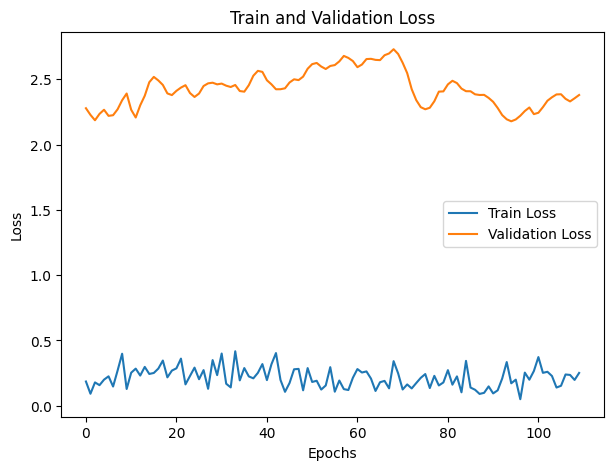

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(range(len(train_loss_list)), train_loss_list, label='Train Loss')
plt.plot(range(len(val_loss_list)), val_loss_list, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

# 실습 과제

위 실습을 응용하여 **본인만의 데이터셋**을 구성하고 학습이 진행됨을 보이시오.

과제에 포함할 내용:

 - 총 4개 이상의 클래스를 분류하는 문제(classification)를 해결
 - 데이터셋에 맞추어 생성한 csv 파일을 다운받아 직접 내용을 검토
 - 학습이 잘되는지 확인


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/*/*.jpeg'

file_list = glob(file_path)
file_list

['/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_01.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_07.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_02.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_04.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_05.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_06.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_03.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_08.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_10.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/ningning/3_09.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/karina/1_09.jpeg',
 

- 해당 클래스를 학습에서 사용하기 위해 karina는 0으로, winter는 1로, ningning은 2으로, giselle은 3로 설정하여 `target`이라는 항목에 저장합니다.


In [ ]:
data_dict = {'image_name':[], 'class':[], 'target':[], 'file_path':[]}
target_dict = {'karina':0, 'winter':1, 'ningning':2, 'giselle':3}

for path in file_list:

    data_dict['file_path'].append(path) # file_path 항목에 파일 경로 저장

    path_list = path.split(os.path.sep) # os별 파일 경로 구분 문자로 split
    print(path_list)

    data_dict['image_name'].append(path_list[-1])
    data_dict['class'].append(path_list[-2])
    data_dict['target'].append(target_dict[path_list[-2]])

train_df = pd.DataFrame(data_dict)
print('\n<data frame>\n', train_df)

train_df.to_csv("/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/train.csv", mode='w')

['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '영상처리와딥러닝', 'data_mj', 'ningning', '3_01.jpeg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '영상처리와딥러닝', 'data_mj', 'ningning', '3_07.jpeg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '영상처리와딥러닝', 'data_mj', 'ningning', '3_02.jpeg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '영상처리와딥러닝', 'data_mj', 'ningning', '3_04.jpeg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '영상처리와딥러닝', 'data_mj', 'ningning', '3_05.jpeg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '영상처리와딥러닝', 'data_mj', 'ningning', '3_06.jpeg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '영상처리와딥러닝', 'data_mj', 'ningning', '3_03.jpeg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '영상처리와딥러닝', 'data_mj', 'ningning', '3_08.jpeg']
['', 'content', 'drive', 'MyDrive', 'Colab Notebooks', '영상처리와딥러닝', '

## 2. 데이터셋 불러오기

In [ ]:
from sklearn.model_selection import train_test_split

def get_df():

    # cvs 파일 읽어서 DataFrame으로 저장
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/영상처리와딥러닝/data_mj/train.csv')

    # 데이터셋을 train, val, test로 나누기
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=2359)
    df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=2359)

    return df_train, df_val, df_test